In [1]:
dados ='/home/dev/PycharmProjects/FallDetection/dados.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/rotulos.npy'

In [2]:
import numpy as np
X = np.load(dados)
y = np.load(rotulos)

In [3]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividindo o conjunto de treinamento em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [4]:
X_train.shape

(988, 400, 1)

In [5]:
X_test.shape

(309, 400, 1)

In [6]:
X_val.shape

(247, 400, 1)

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

2023-05-23 15:32:29.209411: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 15:32:29.247884: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-23 15:32:29.248457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 15:32:29.936367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv1D,Flatten,MaxPooling1D

kernel_size = 8

model = keras.Sequential()


model.add(Conv1D(filters=32, kernel_size=kernel_size, activation='relu', input_shape=(400,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=256, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

#model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

#model.add(Conv1D(filters=1024, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




2023-05-23 15:32:30.678808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 15:32:30.679686: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
historico = model.fit(X_train,y_train,batch_size= 32,epochs = 45, validation_data = (X_val,y_val),verbose =1)

Epoch 1/45
31/31 [==============================] - 2s 44ms/step - loss: 1.7146 - accuracy: 0.3937 - val_loss: 1.2717 - val_accuracy: 0.4575
Epoch 2/45
31/31 [==============================] - 1s 45ms/step - loss: 0.8677 - accuracy: 0.7227 - val_loss: 0.6946 - val_accuracy: 0.7368
Epoch 3/45
31/31 [==============================] - 1s 42ms/step - loss: 0.5732 - accuracy: 0.8219 - val_loss: 1.0278 - val_accuracy: 0.7449
Epoch 4/45
31/31 [==============================] - 1s 41ms/step - loss: 0.5884 - accuracy: 0.8158 - val_loss: 0.6506 - val_accuracy: 0.7895
Epoch 5/45
31/31 [==============================] - 1s 41ms/step - loss: 0.4023 - accuracy: 0.8755 - val_loss: 0.4388 - val_accuracy: 0.8421
Epoch 6/45
31/31 [==============================] - 1s 40ms/step - loss: 0.2959 - accuracy: 0.9028 - val_loss: 0.4220 - val_accuracy: 0.8785
Epoch 7/45
31/31 [==============================] - 1s 39ms/step - loss: 0.2509 - accuracy: 0.9038 - val_loss: 0.3207 - val_accuracy: 0.8866
Epoch 8/45
31

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 393, 32)           288       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 196, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 196, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 189, 64)           16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 94, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 94, 64)            0

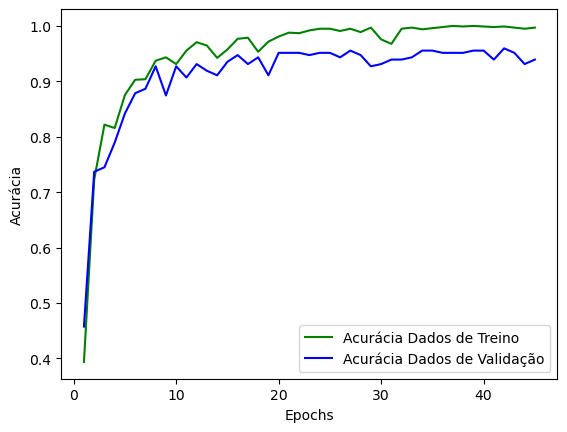

In [11]:
import matplotlib.pyplot as plt


acuracia_treino = historico.history['accuracy'] 
acuracia_val = historico.history['val_accuracy']

epochs = range(1, len(acuracia_treino)+1) 

plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

10/10 [==============================] - 0s 6ms/step


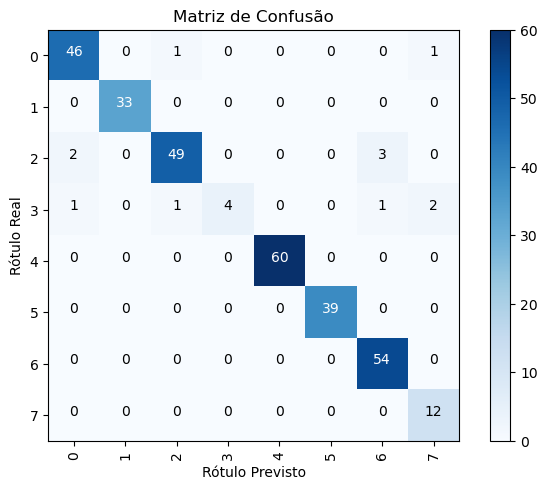

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Obtendo as probabilidades das classes previstas
y_pred_probs = model.predict(X_test)

# Obtendo as classes previstas
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtendo as classes reais
y_true = np.argmax(y_test, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plotando a matriz de confusão
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(0, 8)
plt.xticks(tick_marks, rotation=90)
plt.yticks(tick_marks)

# Adicionando os números nas células da matriz
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Previsto')
plt.show()


In [13]:
from sklearn.metrics import classification_report


target_names = np.arange(0, 8).astype(str)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       1.00      1.00      1.00        33
           2       0.96      0.91      0.93        54
           3       1.00      0.44      0.62         9
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00        39
           6       0.93      1.00      0.96        54
           7       0.80      1.00      0.89        12

    accuracy                           0.96       309
   macro avg       0.95      0.91      0.92       309
weighted avg       0.96      0.96      0.96       309

